#Analysis on Covid-19 Global Cases Data by John Hopkins University and COVID-19 Government Measures Data from The Humanitarian Data Exchange by ACAPS

###This goal of this project is to use two datasets to analyze the impact of various government measures on the spread of COVID-19 in the United States, with a focus on specific states like New York and Illinois. The goal is to understand how different policies, such as the deployment of portable dialysis machines and other healthcare interventions, have influenced the trends in COVID-19 cases.

### Key questions to be addressed in this analysis include:
### 1. How have government interventions impacted the trend of new COVID-19 cases in specific states?
### 2. Are there noticeable changes in case trends before and after the implementation of significant healthcare policies?
### 3. How does the spread of the virus and the effectiveness of measures vary across different regions?

### This analysis is crucial for policymakers, healthcare providers, and public health officials to make informed decisions and strategize future interventions in the ongoing battle against the COVID-19 pandemic.

In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

In [27]:
acaps_data = pd.read_excel('/content/acaps_covid19_government_measures_dataset.xlsx')

In [28]:
us_measures = acaps_data[acaps_data['COUNTRY'] == 'United States']
ny_measures = us_measures[us_measures['ADMIN_LEVEL_NAME'] == 'New York']
ny_isolation_quarantine = ny_measures[ny_measures['MEASURE'] == 'Isolation and quarantine policies']

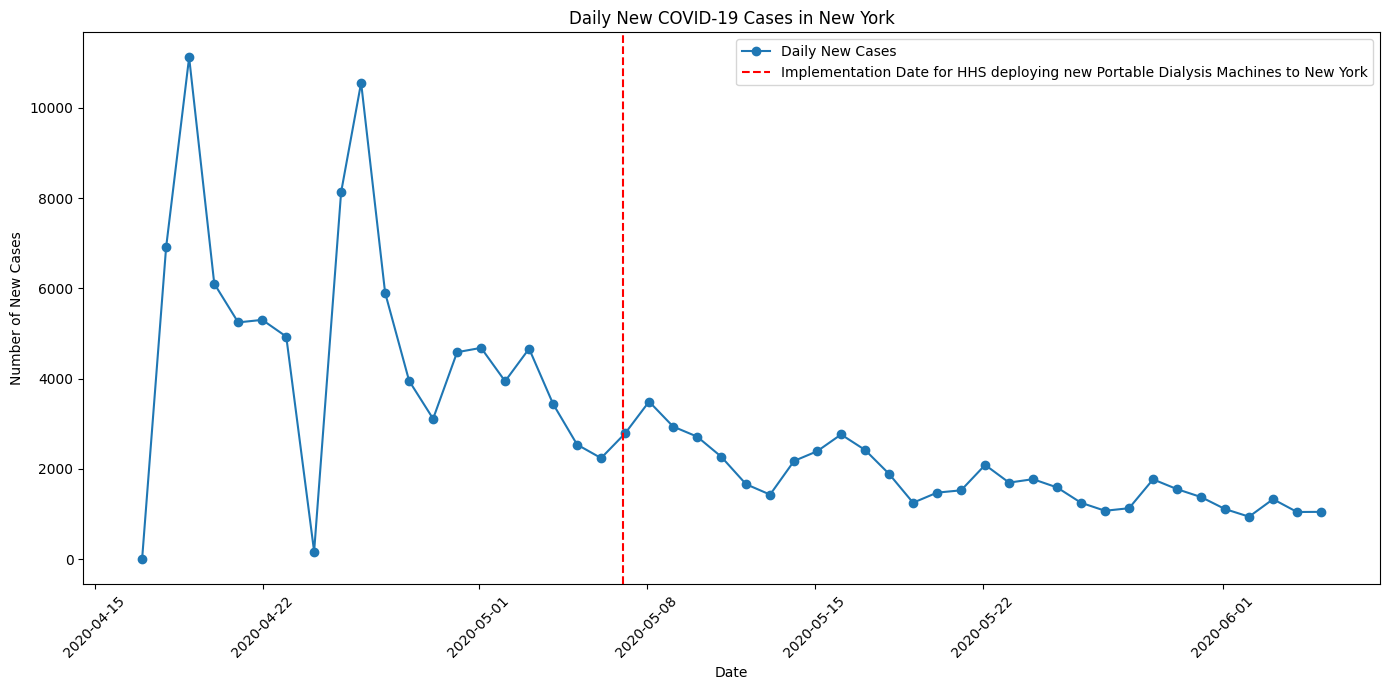

,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,New_Cases
0,New York,US,2020-04-16 23:30:51,42.1657,-74.9481,223691,14832,23887.0,184972.0,36.0,...,50450.0,NaN,84000036.0,USA,2830.222189,22.553433,2020-04-16,550579.0,6.630575,0.0
1,New York,US,2020-04-17 23:30:52,42.1657,-74.9481,230597,17131,23887.0,189579.0,36.0,...,52424.0,NaN,84000036.0,USA,2946.622472,22.734034,2020-04-17,550579.0,7.428978,6906.0
2,New York,US,2020-04-18 22:32:47,42.1657,-74.9481,241712,17634,23887.0,200191.0,36.0,...,54339.0,NaN,84000036.0,USA,3066.441152,22.480886,2020-04-18,596532.0,7.295459,11115.0
3,New York,US,2020-04-19 23:41:01,42.1657,-74.9481,247815,18271,23887.0,205657.0,36.0,...,55723.0,NaN,84000036.0,USA,3174.508770,22.485725,2020-04-19,617555.0,7.372839,6103.0
4,New York,US,2020-04-20 23:36:47,42.1657,-74.9481,253060,18598,23887.0,210575.0,36.0,...,57103.0,NaN,84000036.0,USA,3258.328899,22.565004,2020-04-20,633861.0,7.349245,5245.0


In [29]:
def load_covid_data(date_range):
    all_data = []
    for date in date_range:
        file_name = f'{date}.csv'
        daily_data = pd.read_csv(file_name)
        ny_data = daily_data[daily_data['Province_State'] == 'New York']
        all_data.append(ny_data)
    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Last_Update')
    combined_data['Last_Update'] = pd.to_datetime(combined_data['Last_Update'])
    combined_data['New_Cases'] = combined_data['Confirmed'].diff().fillna(0)
    return combined_data

start_date = datetime(2020, 4, 16)
end_date = datetime(2020, 6, 4)

date_range = pd.date_range(start=start_date, end=end_date, freq='D').strftime('%m-%d-%Y')

covid_data_ny = load_covid_data(date_range)

new_policy_date = datetime(2020, 5, 7)
plt.figure(figsize=(14,7))
plt.plot(covid_data_ny['Last_Update'], covid_data_ny['New_Cases'], marker='o', label='Daily New Cases')
plt.axvline(x=new_policy_date, color='r', linestyle='--', label='Implementation Date for HHS deploying new Portable Dialysis Machines to New York')
plt.xticks(rotation=45)
plt.title('Daily New COVID-19 Cases in New York')
plt.xlabel('Date')
plt.ylabel('Number of New Cases')
plt.legend()
plt.tight_layout()
plt.show()
covid_data_ny.head()


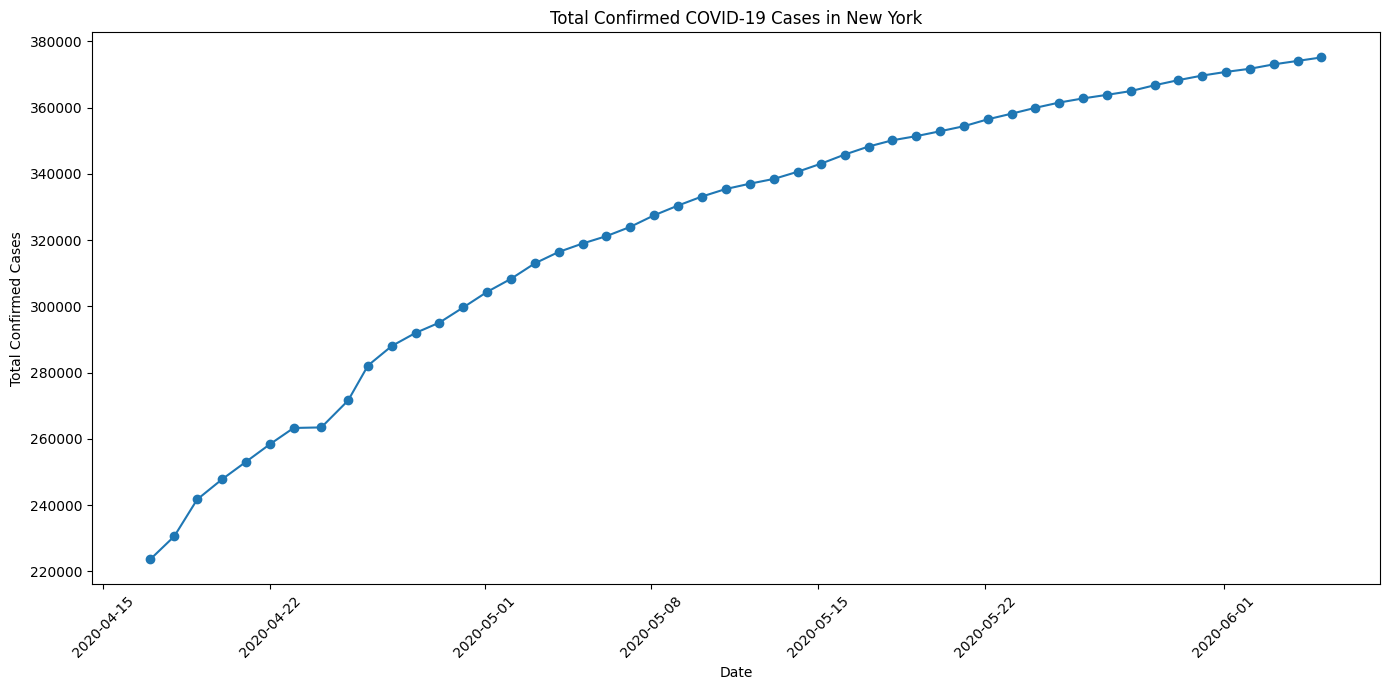

In [30]:
def plot_new_cases(data, title):
    plt.figure(figsize=(14,7))
    plt.plot(data['Last_Update'], data['Confirmed'], marker='o')
    plt.xticks(rotation=45)
    plt.title(title)
    plt.xlabel('Date')
    plt.ylabel('Total Confirmed Cases')
    plt.tight_layout()
    plt.show()

plot_new_cases(covid_data_ny, 'Total Confirmed COVID-19 Cases in New York')


In [31]:
def load_covid_data_for_state(state_name, date_range):
    all_data = []
    for date in date_range:
        file_name = f'{date.strftime("%m-%d-%Y")}.csv'
        # Read the daily data
        daily_data = pd.read_csv(file_name)
        state_data = daily_data[daily_data['Province_State'] == state_name]
        all_data.append(state_data)
    combined_data = pd.concat(all_data, ignore_index=True)
    return combined_data

start_date = datetime.strptime('2020-11-12', '%Y-%m-%d')
end_date = datetime.strptime('2020-12-31', '%Y-%m-%d')

date_range = pd.date_range(start=start_date, end=end_date)

iowa_covid_data = load_covid_data_for_state('Iowa', date_range)

iowa_covid_data = iowa_covid_data.sort_values('Last_Update')
iowa_covid_data['New_Cases'] = iowa_covid_data['Confirmed'].diff().fillna(0)

iowa_covid_data.head()


,Province_State,Country_Region,Last_Update,Lat,Long_,Confirmed,Deaths,Recovered,Active,FIPS,...,People_Hospitalized,Case_Fatality_Ratio,UID,ISO3,Testing_Rate,Hospitalization_Rate,Date,People_Tested,Mortality_Rate,New_Cases
0,Iowa,US,2020-11-13 05:30:30,42.0115,-93.2105,173404,1946,105384.0,66074.0,19.0,...,NaN,1.122235,84000019.0,USA,30577.958651,NaN,2020-11-12,NaN,NaN,0.0
1,Iowa,US,2020-11-14 05:30:30,42.0115,-93.2105,178888,1972,106529.0,70387.0,19.0,...,NaN,1.102366,84000019.0,USA,30796.273934,NaN,2020-11-13,NaN,NaN,5484.0
2,Iowa,US,2020-11-15 05:30:30,42.0115,-93.2105,183555,1985,107541.0,74029.0,19.0,...,NaN,1.081420,84000019.0,USA,31057.504271,NaN,2020-11-14,NaN,NaN,4667.0
3,Iowa,US,2020-11-16 05:30:30,42.0115,-93.2105,186314,1989,107888.0,76437.0,19.0,...,NaN,1.067553,84000019.0,USA,31333.726352,NaN,2020-11-15,NaN,NaN,2759.0
4,Iowa,US,2020-11-17 05:30:30,42.0115,-93.2105,189597,2023,108187.0,79387.0,19.0,...,NaN,1.067000,84000019.0,USA,31468.430177,NaN,2020-11-16,NaN,NaN,3283.0


In [32]:
iowa_covid_data['Last_Update'] = pd.to_datetime(iowa_covid_data['Last_Update'])

policy_date = pd.to_datetime('2020-12-03')

before_policy = iowa_covid_data[iowa_covid_data['Last_Update'] < policy_date]['New_Cases'].mean()
after_policy = iowa_covid_data[iowa_covid_data['Last_Update'] >= policy_date]['New_Cases'].mean()

(before_policy, after_policy)


(2982.9, 1621.6666666666667)

On 3rd December 2020, the Federal Cost Share increased to 100% for Iowa's National Guard COVID-19 response and economic recovery efforts."

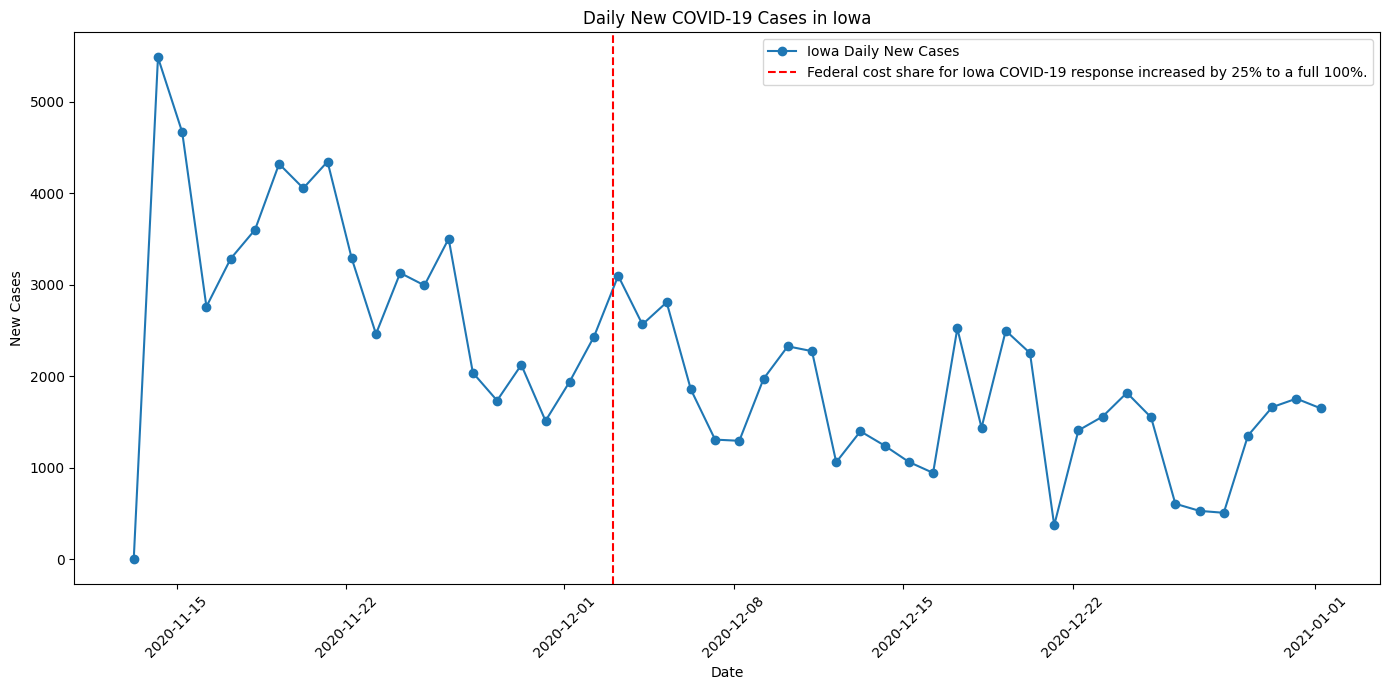

In [33]:
plt.figure(figsize=(14,7))
plt.plot(iowa_covid_data['Last_Update'], iowa_covid_data['New_Cases'], marker='o', label='Iowa Daily New Cases')
plt.axvline(x=policy_date, color='r', linestyle='--', label='Federal cost share for Iowa COVID-19 response increased by 25% to a full 100%.')

plt.xticks(rotation=45)
plt.title('Daily New COVID-19 Cases in Iowa')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()


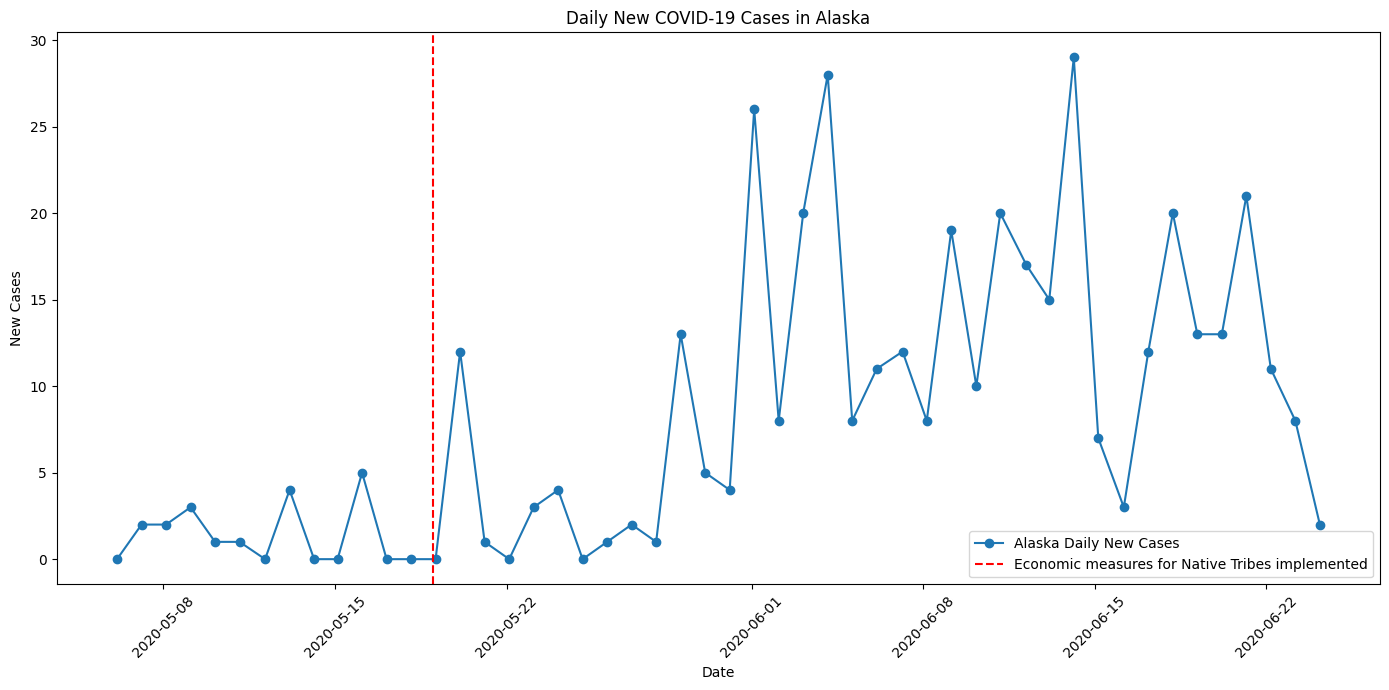

In [34]:
def load_covid_data_for_alaska(date_range):
    all_data = []
    for date in date_range:
        file_name = f'{date.strftime("%m-%d-%Y")}.csv'
        daily_data = pd.read_csv(file_name)
        alaska_data = daily_data[daily_data['Province_State'] == 'Alaska']
        all_data.append(alaska_data)
    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Last_Update')
    combined_data['Last_Update'] = pd.to_datetime(combined_data['Last_Update'])
    combined_data['New_Cases'] = combined_data['Confirmed'].diff().fillna(0)
    return combined_data

# Two weeks before and five weeks after May 19, 2020
start_date = datetime.strptime('2020-05-05', '%Y-%m-%d')
end_date = datetime.strptime('2020-06-23', '%Y-%m-%d')

date_range = pd.date_range(start=start_date, end=end_date)

alaska_covid_data = load_covid_data_for_alaska(date_range)

plt.figure(figsize=(14,7))
plt.plot(alaska_covid_data['Last_Update'], alaska_covid_data['New_Cases'], marker='o', label='Alaska Daily New Cases')
plt.axvline(x=datetime(2020, 5, 19), color='r', linestyle='--', label='Economic measures for Native Tribes implemented')

plt.xticks(rotation=45)
plt.title('Daily New COVID-19 Cases in Alaska')
plt.xlabel('Date')
plt.ylabel('New Cases')
plt.legend()
plt.tight_layout()
plt.show()



On 22nd October 2020, the FDA approved the first Treatment for COVID-19. The antiviral drug Veklury (remdesivir) was approved for use in adult and pediatric patients 12 years of age and older and weighing at least 40 kilograms (about 88 pounds) for the treatment of COVID-19 requiring hospitalization.

Entries for Case Fatality Ratio in the JHU data are missing between the dates of 10/8/2020 and 11/8/2020, so Case Fatality Ratio was calculated manually.

<ipython-input-35-42e56614fd4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois_data['Case_Fatality_Ratio'] = (illinois_data['Deaths'] / illinois_data['Confirmed']) * 100
<ipython-input-35-42e56614fd4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  illinois_data['Case_Fatality_Ratio'] = (illinois_data['Deaths'] / illinois_data['Confirmed']) * 100
<ipython-input-35-42e56614fd4a>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_inde

          Last_Update  Case_Fatality_Ratio
0 2020-10-09 04:30:36             2.922193
1 2020-10-10 04:30:24             2.903527
2 2020-10-11 04:30:32             2.886515
3 2020-10-12 04:30:24             2.864876
4 2020-10-13 04:30:36             2.844718


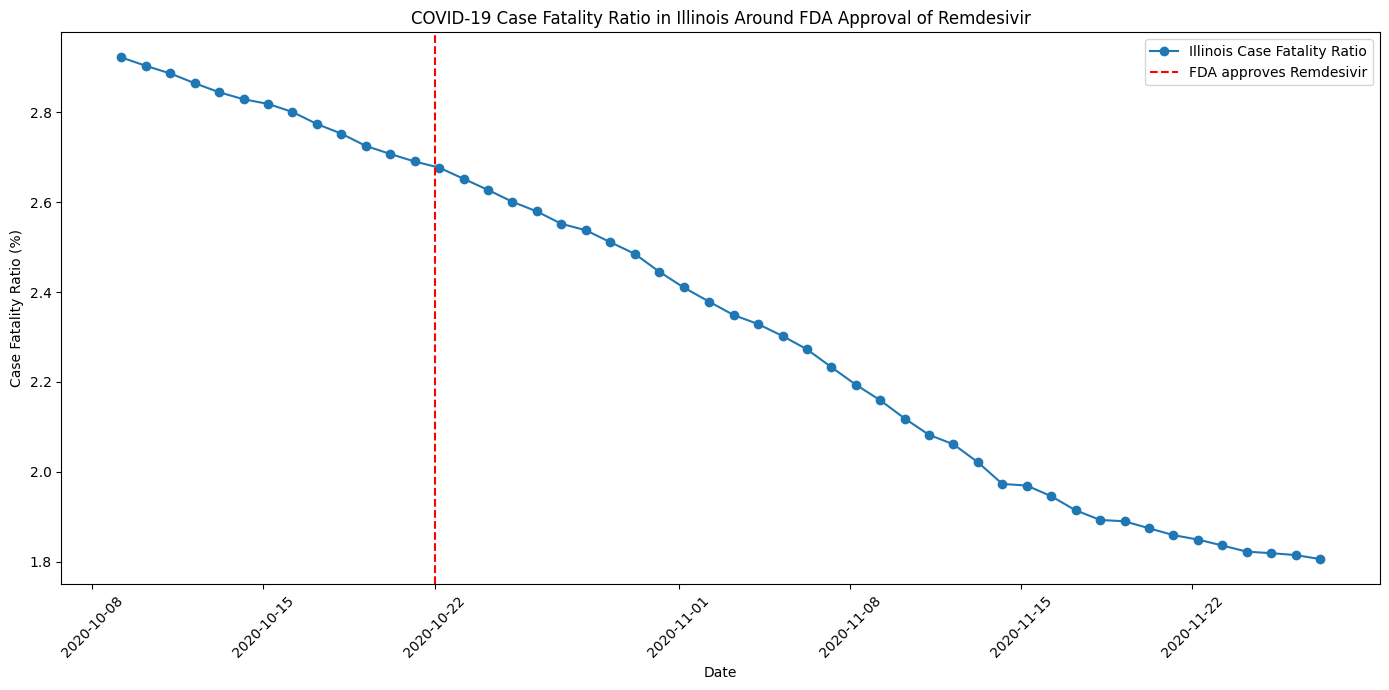

In [35]:
def load_covid_data_case_fatality_ratio_illinois(date_range):
    all_data = []
    for date in date_range:
        file_name = f'{date.strftime("%m-%d-%Y")}.csv'
        daily_data = pd.read_csv(file_name)
        illinois_data = daily_data[daily_data['Province_State'] == 'Illinois']

        if date >= datetime(2020, 10, 8) and date <= datetime(2020, 11, 8):
            illinois_data['Case_Fatality_Ratio'] = (illinois_data['Deaths'] / illinois_data['Confirmed']) * 100

        all_data.append(illinois_data)

    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Last_Update')
    combined_data['Last_Update'] = pd.to_datetime(combined_data['Last_Update'])
    return combined_data

start_date = datetime.strptime('10-08-2020', '%m-%d-%Y')
end_date = datetime.strptime('11-26-2020', '%m-%d-%Y')

date_range = pd.date_range(start=start_date, end=end_date)

illinois_covid_data = load_covid_data_case_fatality_ratio_illinois(date_range)

print(illinois_covid_data[['Last_Update', 'Case_Fatality_Ratio']].head())
plt.figure(figsize=(14,7))
plt.plot(illinois_covid_data['Last_Update'], illinois_covid_data['Case_Fatality_Ratio'], marker='o', label='Illinois Case Fatality Ratio')
plt.axvline(x=datetime(2020, 10, 22), color='r', linestyle='--', label='FDA approves Remdesivir')

plt.xticks(rotation=45)
plt.title('COVID-19 Case Fatality Ratio in Illinois Around FDA Approval of Remdesivir')
plt.xlabel('Date')
plt.ylabel('Case Fatality Ratio (%)')
plt.legend()
plt.tight_layout()
plt.show()


On November 17th 2020, the FDA authorized the first COVID-19 Test for Self-Testing at Home. The Lucira COVID-19 All-In-One Test Kit is a molecular (real-time loop mediated amplification reaction) single use test that is intended to detect the novel coronavirus SARS-CoV-2 that causes COVID-19.

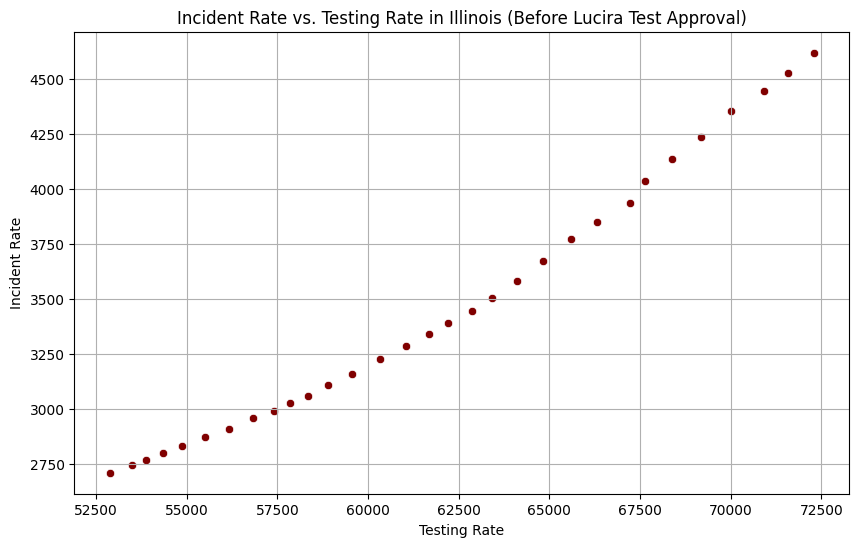

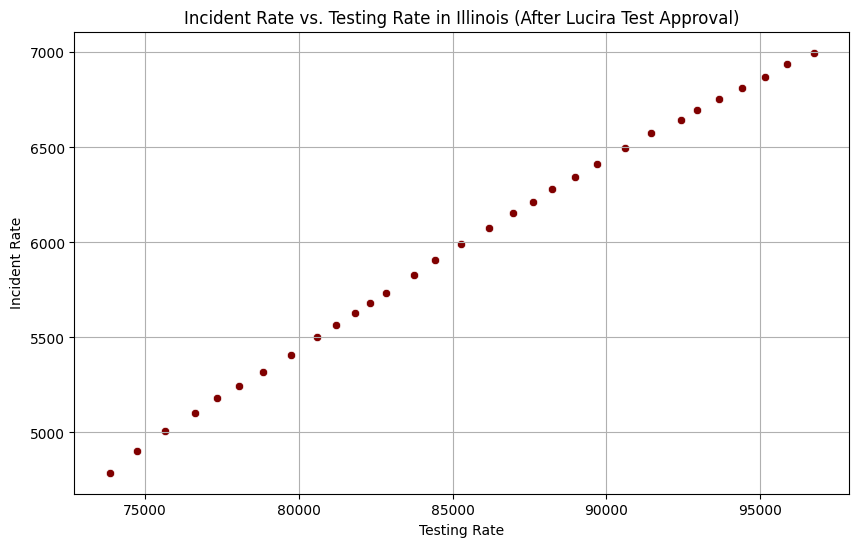

In [36]:
def load_covid_data_illinois(date_range):
    all_data = []
    for date in date_range:
        file_name = f'{date.strftime("%m-%d-%Y")}.csv'
        daily_data = pd.read_csv(file_name)
        illinois_data = daily_data[daily_data['Province_State'] == 'Illinois']
        all_data.append(illinois_data)
    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Last_Update')
    combined_data['Last_Update'] = pd.to_datetime(combined_data['Last_Update'])
    return combined_data


start_date_before = datetime.strptime('10-17-2020', '%m-%d-%Y')
end_date_before = datetime.strptime('11-16-2020', '%m-%d-%Y')
date_range_before = pd.date_range(start=start_date_before, end=end_date_before)

start_date_after = datetime.strptime('11-18-2020', '%m-%d-%Y')
end_date_after = datetime.strptime('12-18-2020', '%m-%d-%Y')
date_range_after = pd.date_range(start=start_date_after, end=end_date_after)

illinois_data_before = load_covid_data_illinois(date_range_before)
illinois_data_after = load_covid_data_illinois(date_range_after)

def plot_scatter(data, title):
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=data, x='Testing_Rate', y='Incident_Rate',color='maroon')
    plt.title(title)
    plt.xlabel('Testing Rate')
    plt.ylabel('Incident Rate')
    plt.grid(True)
    plt.show()

plot_scatter(illinois_data_before, 'Incident Rate vs. Testing Rate in Illinois (Before Lucira Test Approval)')
plot_scatter(illinois_data_after, 'Incident Rate vs. Testing Rate in Illinois (After Lucira Test Approval)')

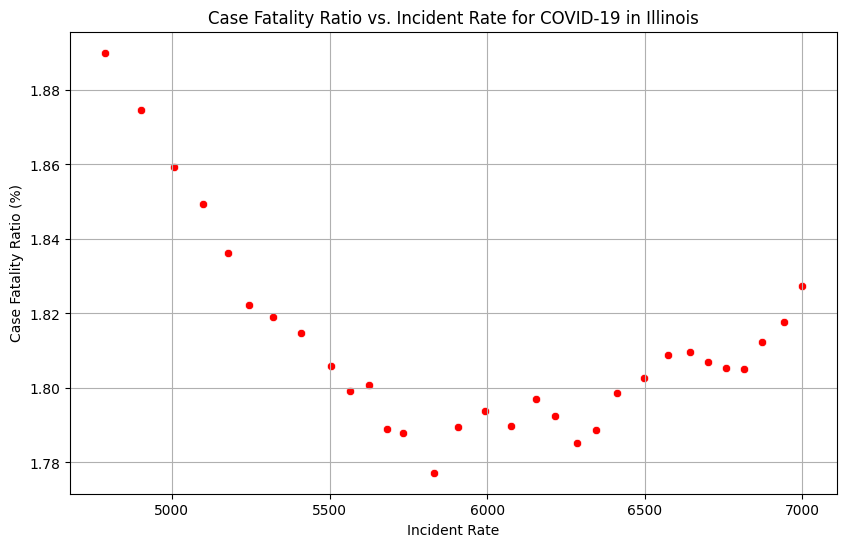

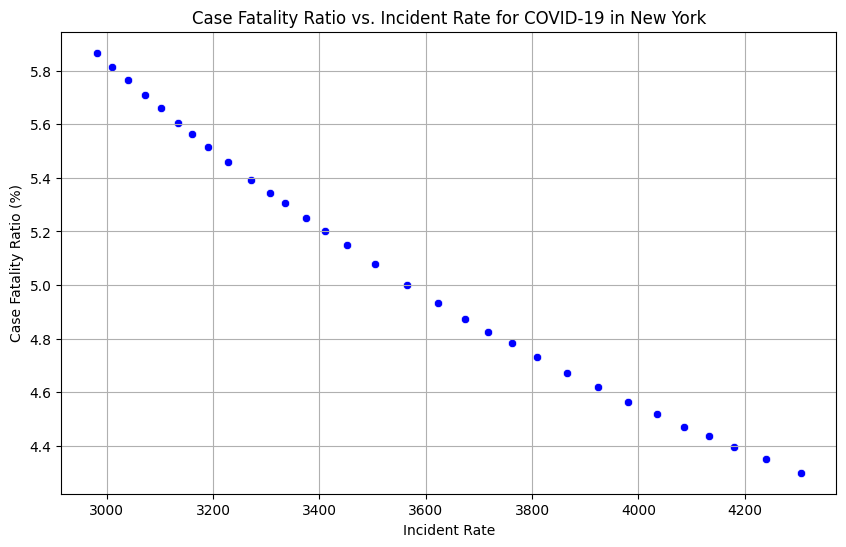

In [37]:
def load_covid_data_jhu(date_range):
    all_data = []
    for date in date_range:
        file_name = f'{date.strftime("%m-%d-%Y")}.csv'
        daily_data = pd.read_csv(file_name)
        all_data.append(daily_data)
    combined_data = pd.concat(all_data, ignore_index=True)
    combined_data = combined_data.sort_values('Last_Update')
    combined_data['Last_Update'] = pd.to_datetime(combined_data['Last_Update'])
    return combined_data

start_date = pd.to_datetime('11-18-2020', format='%m-%d-%Y')
end_date = pd.to_datetime('12-18-2020', format='%m-%d-%Y')
date_range = pd.date_range(start=start_date, end=end_date)

covid_data_jhu = load_covid_data_jhu(date_range)

illinois_data = covid_data_jhu[covid_data_jhu['Province_State'] == 'Illinois']

plt.figure(figsize=(9.89, 6))
sns.scatterplot(data=illinois_data, x='Incident_Rate', y='Case_Fatality_Ratio', color='red')
plt.title('Case Fatality Ratio vs. Incident Rate for COVID-19 in Illinois')
plt.xlabel('Incident Rate')
plt.ylabel('Case Fatality Ratio (%)')
plt.grid(True)
plt.show()

new_york_data = covid_data_jhu[covid_data_jhu['Province_State'] == 'New York']

plt.figure(figsize=(10, 6))
sns.scatterplot(data=new_york_data, x='Incident_Rate', y='Case_Fatality_Ratio', color='blue')
plt.title('Case Fatality Ratio vs. Incident Rate for COVID-19 in New York')
plt.xlabel('Incident Rate')
plt.ylabel('Case Fatality Ratio (%)')
plt.grid(True)
plt.show()
